<a href="https://colab.research.google.com/github/ginzburg1991/time_series_climate_change_models/blob/main/time_series_climate_chance_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title: Using Univariate time series models on thickness of ice to see and predict global warming effects.**

**Michael Giznburg**

**11/14/2023**


**Overview**

The business problem I will attempt to solve here is to create and leverage two univariate time series models on the sea-ice dataset retrieved from the National Snow and Ice Data Center. This is useful for my global environmental agency, which wants to understand climate change better. A brief description of univariate time series modeling can be found here. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ This article goes very in-depth into time series modeling. The article states, "A time series is a sequence where a metric is recorded over regular time intervals." The next step after time series analysis would be forecasting, as described in this article. "But why forecast?" "Forecasting is the next step where you want to predict the future values the series is going to take." and "Because forecasting a time series (like demand and sales) is often of tremendous commercial value." It's important to get these forecasts accurate in order to make a conclusive decision about the warming of the earth over the past decade and make predictions for how warm the earth will get in the future. If, for example, the time series model suggests a potential seasonality or overall decrease in area thickness of the Arctic and Antarctic ice, it could drive political action on global warming and climate change. We will use univariate time series models. "If you use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting." I will use the ARIMA model and a second model, most likely the SARIMA model, which accounts for seasonal changes. We will be using the area variable to construct the models. According to this article https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/, the ARIMA model is an "Autoregressive Integrated Moving Average Model." "It explicitly caters to a suite of standard structures in time series data and provides a simple yet powerful method for making skillful time series forecasts. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. I: Integrated. The use of differencing of raw observations (e.g., subtracting an observation from an observation at the previous time step) in order to make the time series stationary. MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. Each of these components is explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to indicate the specific ARIMA model being used quickly." The second model I will use will be the Holts-Winters Seasonal model, which is the same thing as a Triple Exponential Smoothing model. According to this article https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/ "Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series. This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters. In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component."




**Data**

This data displays the year and month as well as the thickness of the ice in area(variable) during said year and month. There are 513 columns, and no missing values.

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.concat(map(pd.read_csv, ['N_01_extent_v3.0.csv', 'N_02_extent_v3.0.csv','N_03_extent_v3.0.csv','N_04_extent_v3.0.csv','N_05_extent_v3.0.csv','N_06_extent_v3.0.csv','N_07_extent_v3.0.csv','N_08_extent_v3.0.csv','N_09_extent_v3.0.csv','N_10_extent_v3.0.csv','N_11_extent_v3.0.csv' ,'N_12_extent_v3.0.csv']))
#remove the spaces that appear in column headings
df.columns = df.columns.str.replace(' ', '')
#dropping bad rows from dataset
df = df[df['area'] != -9999.00]
#dropping columns we don't need
df=df.drop(['data-type','region','extent'], axis=1)
#create a unique time column to sort on
df["time"] = df["year"].apply(str) + "-" + df["mo"].apply(str).str.zfill(2)
#drop the old columns we don't need now
df=df.drop(['year', 'mo'], axis=1)
#make sure our new unique column is the index which is important for time series data (needs to be in order!)
df = df.set_index('time')
#sort it!
df = df.sort_values(by=['time'])
#make sure it's in order


**EDA**

In [4]:
df.head(50)

,area
time,
1978-11,9.04
1978-12,10.90
1979-01,12.41
1979-02,13.18
1979-03,13.21
1979-04,12.53
1979-05,11.11
1979-06,9.34
1979-07,6.69


from matplotlib import pyplot as plt
_df_0['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

Click on suggested charts to run the  folowing code

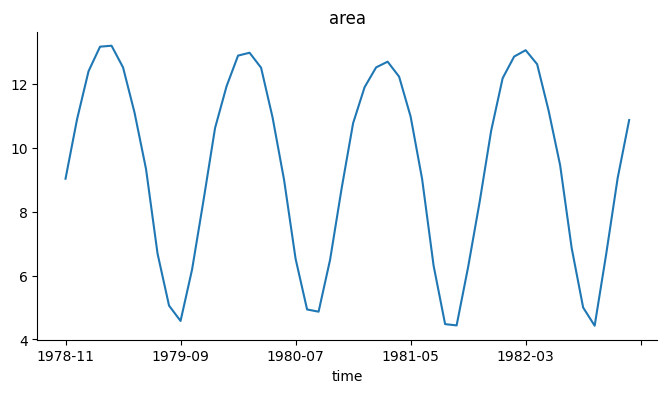

In [6]:
#line plot
from matplotlib import pyplot as plt
_df_1['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

This grapgh makes it look like there is seasonal changes.

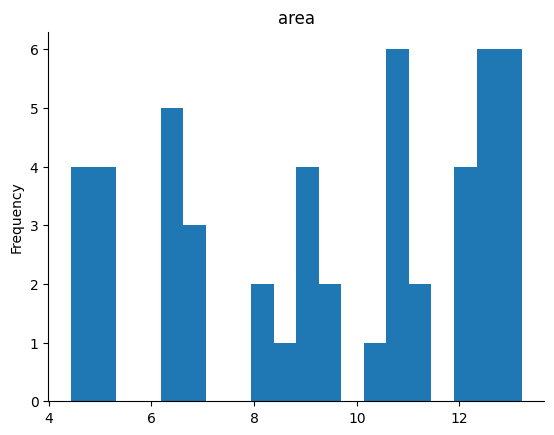

In [7]:
#Histogram
from matplotlib import pyplot as plt
_df_0['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
#513 columns
df.shape

(513, 1)

In [9]:
# No missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1978-11 to 2021-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    513 non-null    float64
dtypes: float64(1)
memory usage: 8.0+ KB


In [10]:
plt.style.use("seaborn")

<ipython-input-10-4b92c22464bb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

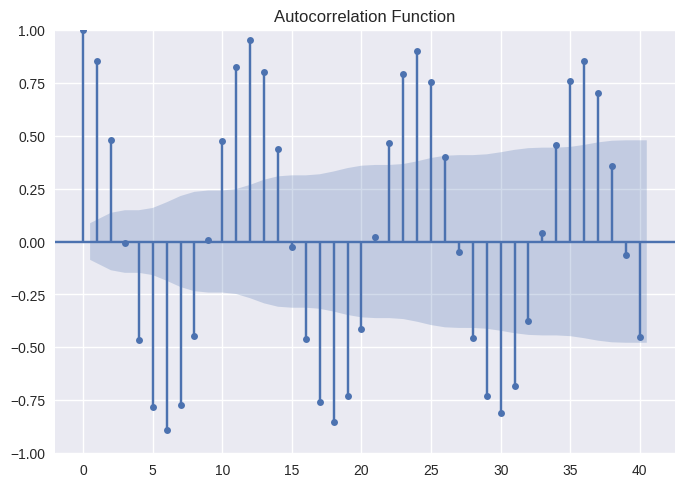

<Figure size 800x550 with 0 Axes>

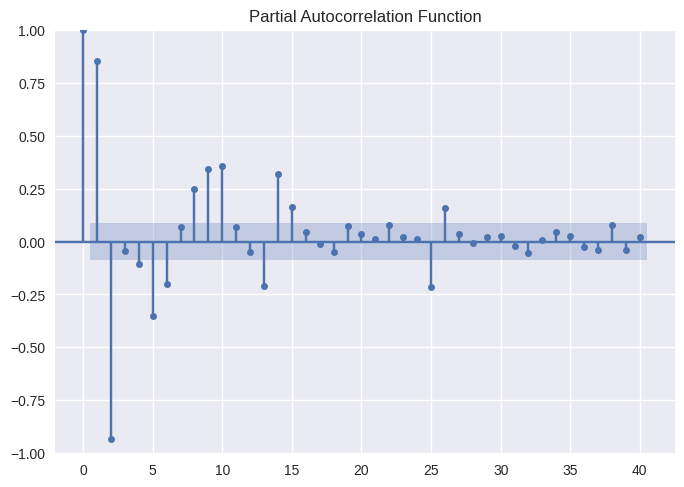

In [11]:
df['area'] = pd.to_numeric(df['area'])

# Plot ACF
plt.figure()
plot_acf(df['area'], lags=40)
plt.title('Autocorrelation Function')

# Plot PACF
plt.figure()
plot_pacf(df['area'], lags=40)
plt.title('Partial Autocorrelation Function')

plt.show()

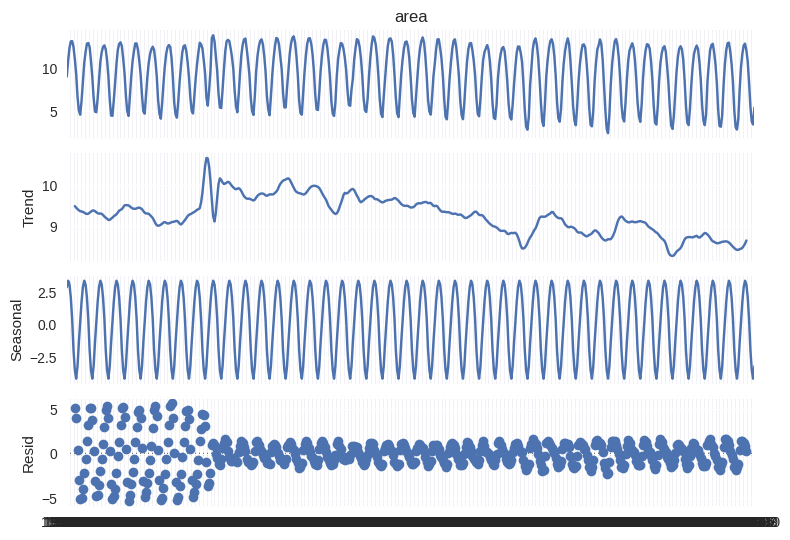

In [12]:
result = seasonal_decompose(df['area'], model='additive', period =12)

result.plot()
plt.show()

**Models**

Splits the data into training data and testing data so we can make accurate predictions.

In [13]:
#can you see that this is the right data?  If so, run the below to get the actual values needed for test and train set.
train, test = df.iloc[:371,0], df.iloc[371:,0]
print(train.tail())
test.head()

time
2009-08     4.16
2009-09     3.76
2009-10     5.24
2009-11     8.36
2009-12    10.59
Name: area, dtype: float64


time
2010-01    12.04
2010-02    12.96
2010-03    13.53
2010-04    12.85
2010-05    10.88
Name: area, dtype: float64

In [14]:
#length of training data
train.shape

(371,)

In [15]:
#length of testing data
test.shape

(142,)

I am using the SARIMA model which is a type of ARIMA model that takes into account seasonal change. It uses p d and q. P is the number of autoregressive terms, d is the number of non seasonal differences needed for stationarity, and q is the number of lagged forecast errors in the prediciton equation. Then for the seasonal order P is the number of autoregressive terms. Q is the number of seasonal moving average terms, and S is the number of time steps for a single seasonal period. There is also m the number of time steps for a single period. This for us would be 12 since there are 12 months in a year.

In [16]:
#sarima_model
p, d, q = 1, 0, 1
start_index = len(train)
end_index = len(df) - 1



I picked p as one because there was a significant spike at lag 1.
I picked d as zero because The ACF and PACF does not suggest any differencing is needed.
I picked q as one because The ACF plot shows a significant spoke at lag 1 suggesting a possible MA term.

For the sesonal order P, Q, and D, I just picked the one that got me the lowest AIC and BIC score. for m i picked 12 because 12 months in a year.

In [17]:
sarimax_model = SARIMAX(train, order=(p,d,q), seasonal_order=(1,1,0, 12))
sarimax_result = sarimax_model.fit()
sarimax_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                area   No. Observations:                  371
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -235.864
Date:                             Sat, 13 Jan 2024   AIC                            479.729
Time:                                     04:22:34   BIC                            495.262
Sample:                                          0   HQIC                           485.906
                                             - 371                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6904      0.016     42.242      0.000       0.658       0.722
ma.L1          0.4624      0.024     18.899      0.000       0.414       0.510
ar.S.L12      -0.3204      0.029    -11.214      0.000      -0.376      -0.264
sigma2         0.2162      0.005     39.542      0.000       0.205       0.227
===================================================================================
Ljung-Box (L1) (Q):                   7.03   Jarque-Bera (JB):              4525.58
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The AIC and BIC for this model is very large which means that the model might be too complex or not fitting well.

In [18]:
sarimax_pred = sarimax_result.predict(start=start_index, end=end_index)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
sarimax_pred.index = test.index

The Holt Winters Seasonal Model uses historical data to estimate, the smoothing coefficient for the level(Alpha), the smoothing coefficcient for the trend(Beta), the smoothing coefficient for the seasonality(Gamma), and the number of time periods in one seasonal cycle(12 for us since there are 12 months in a year). Then it applies the smoothing equations to forecast future values. The forecasts consider the level, trend, and seasonal componenets, giving us a more powerful model. We will also be using additive Seasonality instead of Multplicative Seasonality because the seasonality isn;t exponential, its linear.
https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
"Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality."

<function matplotlib.pyplot.show(close=None, block=None)>

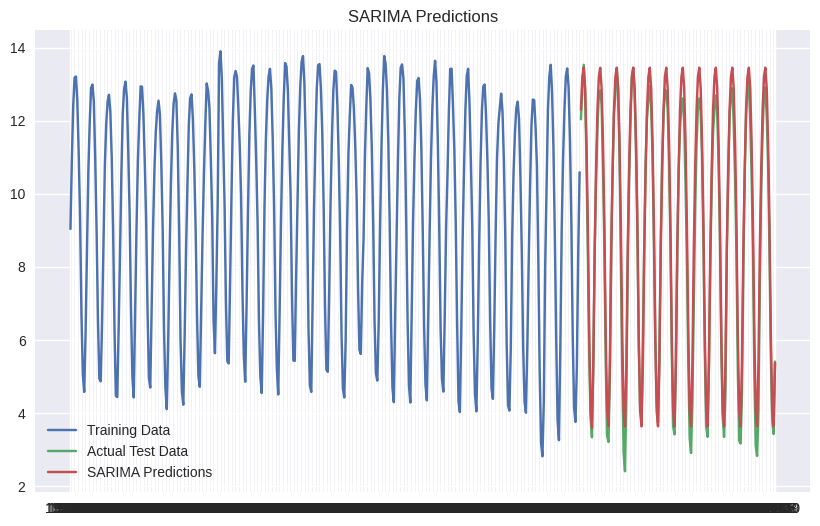

In [20]:
plt.figure(figsize=(10,6))
plt.plot(train, label="Training Data")
plt.plot(test, label='Actual Test Data')
plt.plot(sarimax_pred, label="SARIMA Predictions", alpha=1)
plt.title("SARIMA Predictions")
plt.legend()
plt.show

The model looks pretty consistent with the actual test data with some error in the extremes.  The data shows that the thickness of the ice is lower during the warmer months as X increases.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


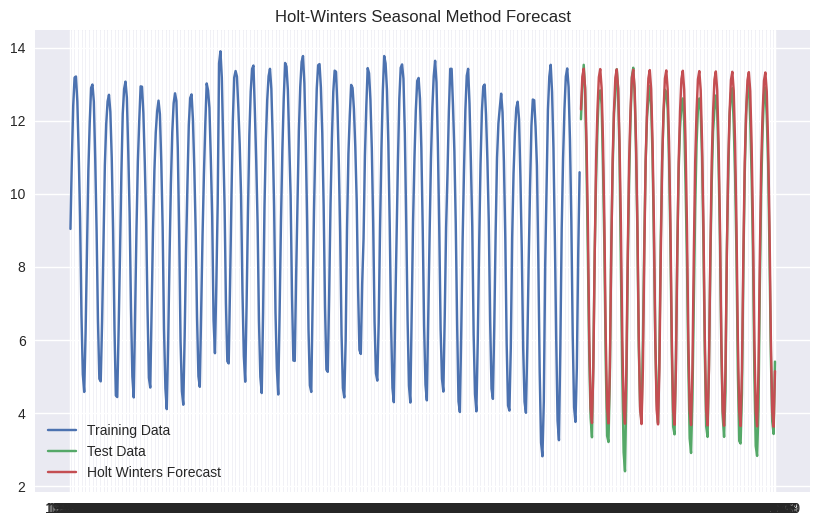

In [21]:
#Holt Winters Seasonal Model
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()

hw_forecast = hw_model.forecast(steps=len(test))

plt.figure(figsize=(10,6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data")
plt.plot(hw_forecast, label="Holt Winters Forecast")
plt.title("Holt-Winters Seasonal Method Forecast")
plt.legend()
plt.show()

The model looks pretty consistent with the actual test data with some error in the extremes. You can see the seasonality of the data but you can also see a gradual overall decrease in ice area thickness. The data shows that the thickness of the ice is lower during the warmer months as X increases.

In [22]:
hw_model.summary()

Dep. Variable:,area,No. Observations:,371
Model:,ExponentialSmoothing,SSE,257.098
Optimized:,True,AIC,-104.063
Trend:,Additive,BIC,-41.403
Seasonal:,Additive,AICC,-102.119
Seasonal Periods:,12,Date:,"Sat, 13 Jan 2024"
Box-Cox:,False,Time:,04:23:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,8.6549e-09,beta,True


The AIC and BIC is much smaller than compared with the SAMIRA model which ussually means a better model.

Evalulation measures for models:
The Holt-Winters Seasonal model performes better than the Sarima Model since Holt-Winters has a AIC of -104.063 and a BIC of -41.403 compared too 479 and 495 respectively. The lower the AIC and BIC the better the model. The lower the AIC and BIC score results in not an overally complex model, as well as a good fit for the model.

**Conclusion**

In conclusion, The Holt-Winters Seasonal model performs better than the SAMIRA model which is a type of AMIRA model, because it has a lower AIC and BIC score. It seems that the models do suggest potential seasonality, but also suggest an overall decrease in area thickness of the Artic and Antarctic ice. If you look at the data and model you can see a very slight decrease in tempetures as x increases. Also if you look at the trend grapgh in the EDA you can also see that it is decreasing gradually. So while yes, there is a seasonality component to the Arctic Ice area it is also important to inform political leaders of the findings that the ice is gradually shirnking in area. We solved the problem of if the ice area is shrinking or not and if it is caused by seasons(which it is), but it is also shrinking overall.